## Unit 12 - Tales from the Crypto 

### 1. Sentiment Analysis

> Use the newsapi to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.
Use descriptive statistics to answer the following questions:

1. Which coin had the highest mean positive score? 
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial Imports

import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dallolmac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key text.latex.preview in file /Users/dallolmac/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/dallolmac/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_qualit

In [2]:
# Read your api key environment variable
# use the dotenv for this purpose

load_dotenv()
api_key = os.getenv('NEWS_API')



In [3]:
# Create News API client instance

newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles

bitcoin_news_everything = newsapi.get_everything(
    q='bitcoin',
    language='en',
    page_size=100,
    sort_by='relevancy'
) 

# Let's see how many articles we got
print(f"Total Articles about bitcoin:{bitcoin_news_everything['totalResults']}")

Total Articles about bitcoin:8290


In [5]:
# Fetch the Etheruem news articles
etheruem_news_everything = newsapi.get_everything(
    q='etheruem',
    language='en',
    page_size=100,
    sort_by='relevancy'
) 

# Let's see how many articles we got
print(f"Total Articles about Etheruem:{etheruem_news_everything['totalResults']}")

Total Articles about Etheruem:12


In [6]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_news_everything["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
    
bitcoin_df.tail()

,text,date,compound,positive,negative,neutral
95,The crypto market's whiplash volatility can ma...,2022-01-19,0.5574,0.129,0.000,0.871
96,"They say time is money, but if that’s true, mo...",2022-01-12,0.5719,0.089,0.000,0.911
97,[T]he biggest attraction was having total and ...,2022-02-07,0.2960,0.075,0.045,0.879
98,Quantum computers would need to become around ...,2022-01-26,0.0516,0.061,0.056,0.882
99,US stock futures slipped Monday after the majo...,2022-02-07,0.6124,0.147,0.000,0.853


In [7]:
# Create the Ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in etheruem_news_everything["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.tail()

,text,date,compound,positive,negative,neutral
7,"Amid reports that Meta is venturing into NFTs,...",2022-01-20,0.0000,0.000,0.000,1.000
8,Web3 or Web 3.0 as crypto boomers like to call...,2022-01-31,0.3832,0.113,0.045,0.842
9,"Finding the best altcoins can be tricky, as th...",2022-02-04,0.7424,0.175,0.041,0.785
10,"Hey peeps, are you looking for the simplest wa...",2022-01-27,0.0000,0.000,0.000,1.000
11,If blockchains are immutable records of our di...,2022-01-19,0.0387,0.034,0.000,0.966


In [8]:
# Describe the Bitcoin Sentiment

bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.071357,0.069770,0.048380,0.881820
std,0.426293,0.061656,0.066269,0.086454
min,-0.862200,0.000000,0.000000,0.662000
25%,-0.296000,0.000000,0.000000,0.835000
50%,0.064400,0.068500,0.000000,0.894500
75%,0.426225,0.111250,0.086500,0.937250
max,0.834100,0.234000,0.266000,1.000000


In [9]:
# Describe the Ethereum Sentiment

ethereum_df.describe()

,compound,positive,negative,neutral
count,12.000000,12.000000,12.000000,12.000000
mean,0.117775,0.053083,0.021083,0.925917
std,0.291142,0.056674,0.033517,0.071531
min,-0.421500,0.000000,0.000000,0.785000
25%,0.000000,0.000000,0.000000,0.874000
50%,0.038700,0.034500,0.000000,0.954000
75%,0.282950,0.081500,0.042000,0.974500
max,0.742400,0.175000,0.088000,1.000000


## Questions

- Q: Which coin had the highest mean positive score?
- A: Ethereum had the highest mean positive score with a mean of .082, compared to bitcoin's mean positive score of .055.

- Q: Which coin had the highest compound score?

- A: Ethereum had the highest compound score with a max of .883, compared to bitcoin's max compound score of .878.

- Q. Which coin had the highest positive score?
- A: Bitcoin had the highest positive score with a max of .234, compared to ethereum's max positive score of .175.

## Natural Language Processing


### Tokenizer

>In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:

- Lowercase each word.
- Remove Punctuation.
- Remove Stopwords.

In [10]:
# Import Dependencies for NLP - NLTK : Natural Language Toolkit , string : Common string operations
# re : Regular expression operations

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [14]:
# Instantiate the lemmatizer : To convert words to their base form

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
StopWords = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
print(StopWords)


{'such', 'doing', 'their', 'by', "you're", "needn't", 'am', 'myself', 'weren', 'about', 'here', 'which', 'any', 'ain', 'his', "isn't", 'mightn', "wouldn't", 'until', 'what', 'll', 'that', 'd', 'most', 'so', 'them', 'ours', "you'll", 'further', 'there', 'nor', 'who', 'does', 'were', 'theirs', "won't", 'than', 'yourselves', 'our', 'again', 'doesn', 'both', 'just', 'you', 'whom', 're', "should've", 'did', "weren't", 'him', 'this', "didn't", 'other', 'but', "hadn't", "mightn't", 'has', 'during', 'same', 'out', 'needn', 'hadn', 'below', "couldn't", 'herself', "it's", 'above', 'the', 'yourself', 'ma', 'itself', 'have', 'off', 'from', 'won', 'yours', 'can', 've', "doesn't", 'had', 'and', 'on', 'all', 'being', 'its', 'too', 'do', 'under', 'more', 'now', 'then', 'i', 'my', 'those', 'over', 'be', 'he', 'as', 'when', 'between', 'was', 'while', 'own', "wasn't", 'hers', 'into', "don't", 'to', 'aren', 'if', 'themselves', 'a', "shan't", 'before', 'shan', 'down', "mustn't", 'hasn', "that'll", 'shouldn

In [40]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    regex = re.compile("[^a-zA-Z ]") # Convert the words to lower case
    re_clean = regex.sub('', text) # Remove the punctuation
    words = word_tokenize(re_clean) # Remove the stop words
    lem = [lemmatizer.lemmatize(word) for word in words] # Lemmatize words into root words
    
    tokens = [word.lower() for word in lem if word.lower() not in StopWords]
    
    
    return tokens

In [45]:
# Create a new tokens column for Bitcoin

bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Even if you arent paying attention to Bitcoin ...,2022-02-09,0.5859,0.124,0.000,0.876,"[even, arent, paying, attention, bitcoin, cryp..."
1,When Denis Rusinovich set up cryptocurrency mi...,2022-01-12,0.0000,0.000,0.000,1.000,"[denis, rusinovich, set, cryptocurrency, minin..."
2,El Salvador introduced Bitcoin as a legal tend...,2022-01-25,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, legal, ten..."
3,Were officially building an open Bitcoin minin...,2022-01-14,-0.4404,0.000,0.083,0.917,"[officially, building, open, bitcoin, mining, ..."
4,Israeli national Tal Prihar pled guilty to rou...,2022-01-27,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."


In [46]:
# Create a new tokens column for Ethereum

ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,"On this Jan. 12 edition of ""The Crypto Show"" o...",2022-01-20,0.0000,0.000,0.000,1.000,"[jan, edition, crypto, show, backstage, passfo..."
1,If blockchains are immutable records of our di...,2022-01-19,0.0387,0.034,0.000,0.966,"[blockchains, immutable, record, digital, hist..."
2,Fears of a prolonged crypto winter are coming ...,2022-01-27,-0.0772,0.071,0.079,0.850,"[fears, prolonged, crypto, winter, coming, fru..."
3,What happened\r\nThe crypto market sell-off ha...,2022-01-10,-0.4215,0.000,0.088,0.912,"[happenedthe, crypto, market, selloff, ha, con..."
4,What happened\r\nToday's move in three of the ...,2022-01-14,0.3818,0.118,0.000,0.882,"[happenedtodays, move, three, top, five, crypt..."


## NGrams and Frequency Analysis

>In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin.

In [43]:
from collections import Counter
from nltk import ngrams

In [44]:
# Generate the Bitcoin N-grams where N=2

bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('jan', 'reuters'): 17, ('reuters', 'bitcoin'): 12, ('new', 'york'): 10, ('char', 'new'): 8, ('feb', 'reuters'): 8, ('el', 'salvador'): 7, ('char', 'bitcoin'): 7, ('york', 'jan'): 6, ('international', 'monetary'): 5, ('bitcoin', 'mining'): 5}


In [47]:
# Generate the Ethereum N-grams where N=2

ethereum_text = ' '.join(ethereum_df.text)
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(10)))

{('char', 'blockchains'): 2, ('blockchains', 'immutable'): 2, ('immutable', 'record'): 2, ('record', 'digital'): 2, ('digital', 'history'): 2, ('history', 'kind'): 2, ('kind', 'history'): 2, ('history', 'want'): 2, ('want', 'inscribe'): 2, ('inscribe', 'predictably'): 2}


In [50]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [51]:
# Use token_count to get the top 10 words for Bitcoin

bitcoin_top10 = token_count(bitcoin_processed)
bitcoin_top10

[('char', 99),
 ('bitcoin', 66),
 ('cryptocurrency', 34),
 ('reuters', 33),
 ('ha', 22),
 ('new', 21),
 ('jan', 18),
 ('us', 14),
 ('said', 14),
 ('company', 13)]

In [52]:
# Use token_count to get the top 10 words for Ethereum

ethereum_top10 = token_count(ethereum_processed)
ethereum_top10

[('char', 12),
 ('crypto', 7),
 ('record', 4),
 ('history', 4),
 ('market', 4),
 ('volatility', 3),
 ('token', 3),
 ('trading', 3),
 ('stock', 3),
 ('today', 3)]

## Word Clouds

>In this section, you will generate word clouds for each coin to summarize the news for each coin

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

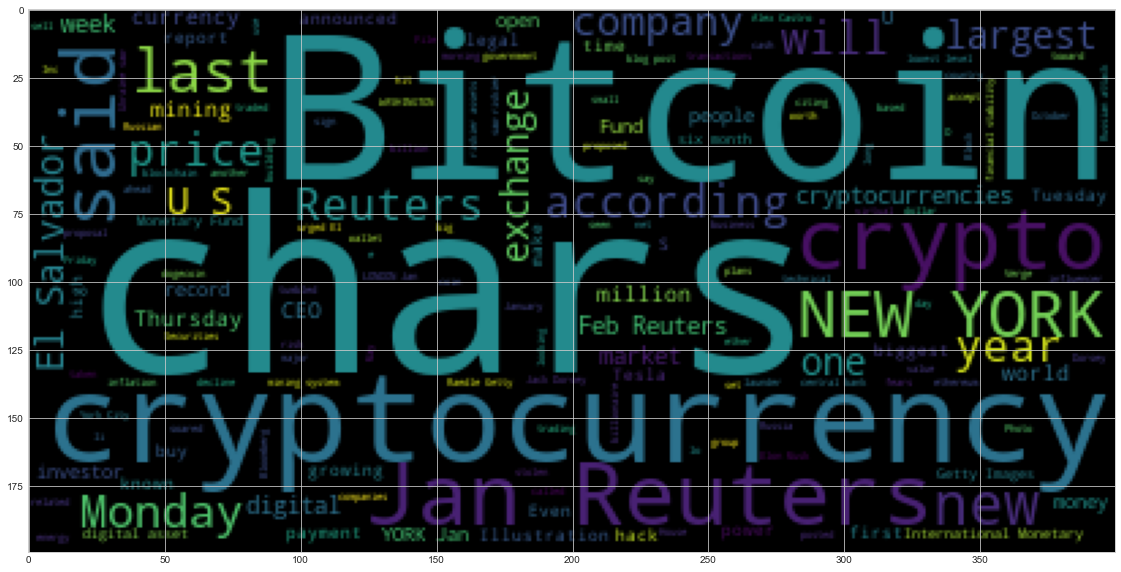

In [54]:
# Generate the Bitcoin word cloud

wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

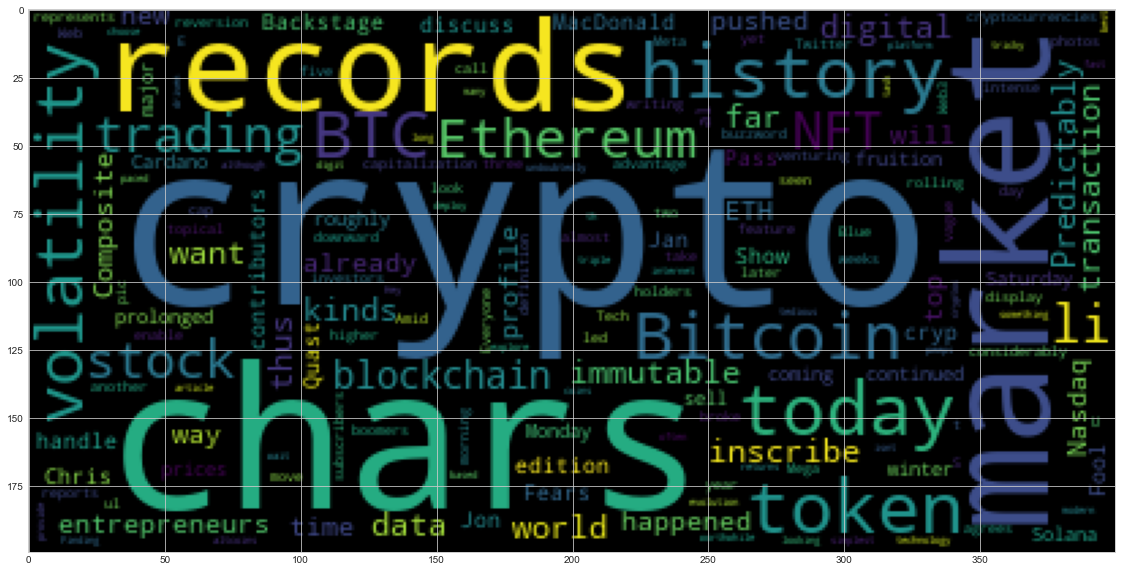

In [55]:
# Generate the Ethereum word cloud

wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

## 3. Named Entity Recognition (NER)

> In this section, we will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [56]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [58]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

### Bitcoin NER

In [59]:
# Concatenate all of the Bitcoin text together

bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars] When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars] Were officially building an open Bitcoin mining system\r\nPhoto by Joe Raedle/Getty Images\r\nBlock, the payment company formerly known as Square, is working on building an open Bitcoin mining system, it… [+2078 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Al

In [60]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data['title'] = "Bitcoin NER"

In [61]:
# Render the visualization

displacy.render(bitcoin_doc, style='ent')

In [62]:
# List all Entities

for ent in bitcoin_doc.ents :
    print(ent.text + ' ' +ent.label_)

last week DATE
3 MONEY
Denis Rusinovich PERSON
Maveric Group ORG
Kazakhstan GPE
2017 DATE
China GPE
Russia GPE
El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Bitcoin PERSON
Joe Raedle/Getty Images PERSON
Square FAC
Bitcoin PERSON
Israeli NORP
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Jack Dorsey PERSON
Twitter PRODUCT
first ORDINAL
October last year DATE
the "Giga Texas ORG
Elon Musk PERSON
Friday DATE
Fintech ORG
New York City GPE
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Changpeng PERSON
Binanc

## Ethereum NER

In [63]:
# Concatenate all of the Ethereum text together

ethereum_text = ' '.join(ethereum_df.text)
ethereum_text

'On this Jan. 12\xa0edition of "The Crypto Show" on Backstage Pass,\xa0Fool.com contributors Chris MacDonald and Jon Quast discuss volatility in the crypto world, and how to handle this volatility with cryp… [+3209 chars] If blockchains are immutable records of our digital history, what kinds of history do we want to inscribe on them? Predictably, most records thus far have been transaction data, but as entrepreneurs … [+1723 chars] Fears of a prolonged crypto winter are coming to fruition. On Saturday, prices of major cryptos like Bitcoin (CRYPTO:BTC), Ethereum (CRYPTO:ETH), Solana, and Cardano were all down roughly 50% from al… [+5055 chars] What happened\r\nThe crypto market sell-off has continued into Monday, with most tokens down considerably in morning trading. Mega-cap tokens Bitcoin\xa0(CRYPTO:BTC) and\xa0Ethereum\xa0(CRYPTO:ETH) both broke t… [+2290 chars] What happened\r\nToday\'s move in three of the top five cryptocurrencies by market capitalization represents yet another r

In [64]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [65]:
# Render the visualization

displacy.render(ethereum_doc, style='ent')

In [66]:
# List all Entities

for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)

Jan. 12 DATE
The Crypto Show WORK_OF_ART
Chris MacDonald PERSON
Jon Quast ORG
winter DATE
Saturday DATE
Bitcoin PERSON
Ethereum PERSON
ETH ORG
Solana PERSON
Cardano PERSON
roughly 50% PERCENT
Monday DATE
morning TIME
ETH ORG
Today DATE
three CARDINAL
five CARDINAL
just two trading weeks DATE
the new year DATE
U.S. GPE
over 5% PERCENT
today DATE
markets</li><li ORG
today DATE
Nasdaq ORG
almost 3.3% PERCENT
later in the day TIME
Meta ORG
Twitter PRODUCT
today DATE
Blue ORG
NFT ORG
3.0 CARDINAL
